In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sea-surface-temp/Sea Surface Temp.nc


In [2]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 43.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.0 MB/s eta 0:00:00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import pandas as pd


ds = xr.open_dataset('/kaggle/input/sea-surface-temp/Sea Surface Temp.nc',engine="h5netcdf")
# عرض ملخص البيانات
print(ds)

# عرض أسماء المتغيرات في المل

<xarray.Dataset> Size: 6MB
Dimensions:             (lat: 180, lon: 360, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * lon                 (lon) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * time                (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 192B ...
    sst                 (time, lat, lon) float32 3MB ...
    valid_yr_count      (time, lat, lon) float32 3MB ...
Attributes:
    title:                          created 12/2013 from data provided by JRA
    history:                        Created 2023/12/08 by doMonthLTMNC4
    platform:                       Analyses
    citation:                       Hirahara, S., Ishii, M., and Y. Fukuda,20...
    institution:                    NOAA ESRL/PSD
    Conventions:                    CF-1.2
    dataset_title:                  COBE-SS

/tmp/ipykernel_35/2826196946.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  ds = xr.open_dataset('/kaggle/input/sea-surface-temp/Sea Surface Temp.nc',engine="h5netcdf")
/tmp/ipykernel_35/2826196946.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  ds = xr.open_dataset('/kaggle/input/sea-surface-temp/Sea Surface Temp.nc',engine="h5netcdf")


In [12]:
df = ds['sst'].to_dataframe().reset_index()
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,time,lat,lon,sst
0,0001-01-01 00:00:00,89.5,0.5,-1.685284
1,0001-01-01 00:00:00,89.5,1.5,-1.685284
2,0001-01-01 00:00:00,89.5,2.5,-1.685217
3,0001-01-01 00:00:00,89.5,3.5,-1.684050
4,0001-01-01 00:00:00,89.5,4.5,-1.683783
...,...,...,...,...
777595,0001-12-01 00:00:00,-89.5,355.5,NaN
777596,0001-12-01 00:00:00,-89.5,356.5,NaN
777597,0001-12-01 00:00:00,-89.5,357.5,NaN
777598,0001-12-01 00:00:00,-89.5,358.5,NaN


# data clear 

In [13]:
df.isnull().sum()# التاكد من القيم المفقودة 

time         0
lat          0
lon          0
sst     252012
dtype: int64

In [14]:
df = df.dropna(subset=['sst']) #حذف القيم الفارغه 
df.isnull().sum()

time    0
lat     0
lon     0
sst     0
dtype: int64

In [15]:
df.describe().T#وصف لل

,count,mean,std,min,25%,50%,75%,max
lat,525588.0,-0.347873,48.739750,-84.500000,-42.5000,-5.500000,37.500000,89.50000
lon,525588.0,191.885574,99.415550,0.500000,114.5000,194.500000,273.500000,359.50000
sst,525588.0,13.665093,11.619387,-1.898199,1.0289,14.383668,25.502305,33.42548


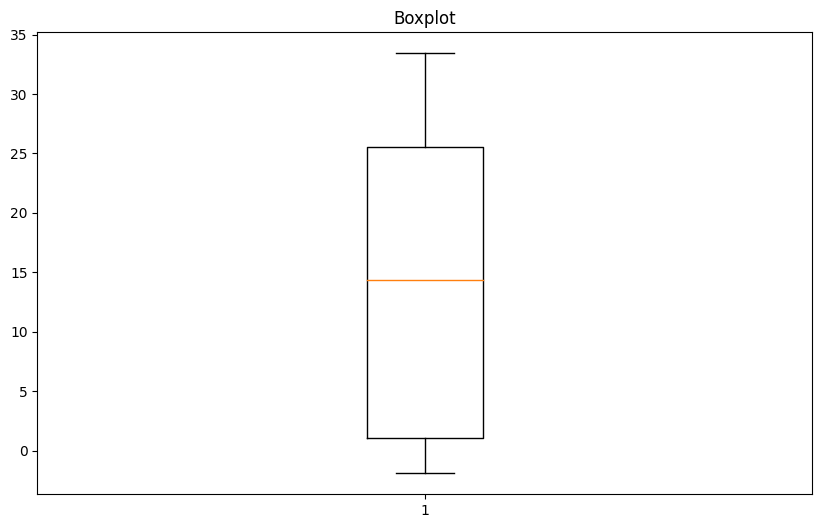

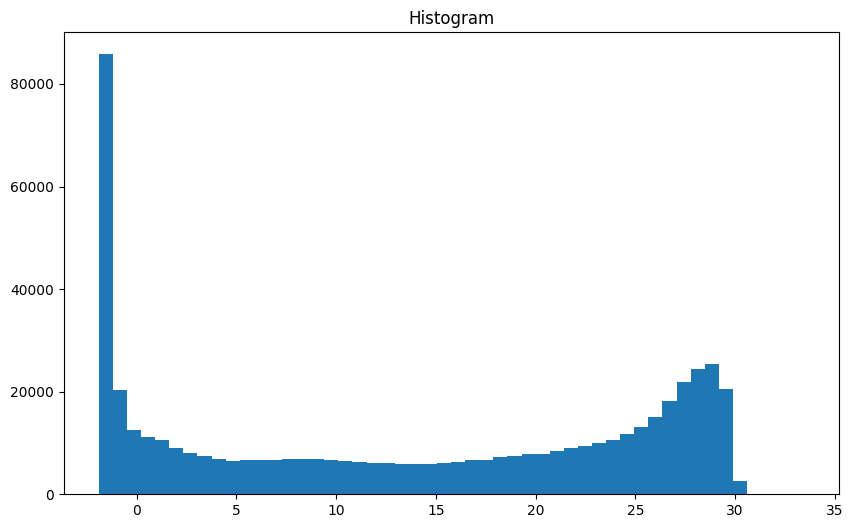

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.boxplot(df['sst'])
plt.title('Boxplot')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['sst'], bins=50)
plt.title('Histogram')
plt.show()

الواضح في الصورة ان درجة الحرارة من 0لي 5- هي اكثر  
اي ان الجو يكون بارد في اكثر 
وقليل ما تكون درجة الخرارة 15 و 31

## عمل ميزات جديدة 

In [17]:
df['year'] = df['time'].apply(lambda x: x.year)
df['month'] = df['time'].apply(lambda x: x.month)
df['day'] = df['time'].apply(lambda x: x.day)

df

/tmp/ipykernel_35/1243040678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['time'].apply(lambda x: x.year)
/tmp/ipykernel_35/1243040678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['time'].apply(lambda x: x.month)
/tmp/ipykernel_35/1243040678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,time,lat,lon,sst,year,month,day
0,0001-01-01 00:00:00,89.5,0.5,-1.685284,1,1,1
1,0001-01-01 00:00:00,89.5,1.5,-1.685284,1,1,1
2,0001-01-01 00:00:00,89.5,2.5,-1.685217,1,1,1
3,0001-01-01 00:00:00,89.5,3.5,-1.684050,1,1,1
4,0001-01-01 00:00:00,89.5,4.5,-1.683783,1,1,1
...,...,...,...,...,...,...,...
775644,0001-12-01 00:00:00,-84.5,204.5,-1.778900,1,12,1
775645,0001-12-01 00:00:00,-84.5,205.5,-1.823684,1,12,1
775646,0001-12-01 00:00:00,-84.5,206.5,-1.837550,1,12,1
775647,0001-12-01 00:00:00,-84.5,207.5,-1.835467,1,12,1


In [18]:
df.drop('time', axis=1, inplace=True)
#حذف ميزه السهر لانها اصبحت غير مفيدة بعد ان قمنا باضافه الميزان السابقة 

/tmp/ipykernel_35/1035152272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('time', axis=1, inplace=True)


In [19]:
df

,lat,lon,sst,year,month,day
0,89.5,0.5,-1.685284,1,1,1
1,89.5,1.5,-1.685284,1,1,1
2,89.5,2.5,-1.685217,1,1,1
3,89.5,3.5,-1.684050,1,1,1
4,89.5,4.5,-1.683783,1,1,1
...,...,...,...,...,...,...
775644,-84.5,204.5,-1.778900,1,12,1
775645,-84.5,205.5,-1.823684,1,12,1
775646,-84.5,206.5,-1.837550,1,12,1
775647,-84.5,207.5,-1.835467,1,12,1


In [20]:
df.head(100000)

,lat,lon,sst,year,month,day
0,89.5,0.5,-1.685284,1,1,1
1,89.5,1.5,-1.685284,1,1,1
2,89.5,2.5,-1.685217,1,1,1
3,89.5,3.5,-1.684050,1,1,1
4,89.5,4.5,-1.683783,1,1,1
...,...,...,...,...,...,...
151023,30.5,183.5,18.120466,1,3,1
151024,30.5,184.5,18.077969,1,3,1
151025,30.5,185.5,18.003986,1,3,1
151026,30.5,186.5,17.979454,1,3,1


In [21]:
#حساب المتوسط الشهري للحراة 

monthly_avg = df.groupby(['year', 'month'])['sst'].mean().reset_index()
monthly_avg.rename(columns={'sst': 'monthly_avg_sst'}, inplace=True)
df = pd.merge(df, monthly_avg, on=['year', 'month'], how='left')
df

,lat,lon,sst,year,month,day,monthly_avg_sst
0,89.5,0.5,-1.685284,1,1,1,13.594199
1,89.5,1.5,-1.685284,1,1,1,13.594199
2,89.5,2.5,-1.685217,1,1,1,13.594199
3,89.5,3.5,-1.684050,1,1,1,13.594199
4,89.5,4.5,-1.683783,1,1,1,13.594199
...,...,...,...,...,...,...,...
525583,-84.5,204.5,-1.778900,1,12,1,13.436364
525584,-84.5,205.5,-1.823684,1,12,1,13.436364
525585,-84.5,206.5,-1.837550,1,12,1,13.436364
525586,-84.5,207.5,-1.835467,1,12,1,13.436364


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


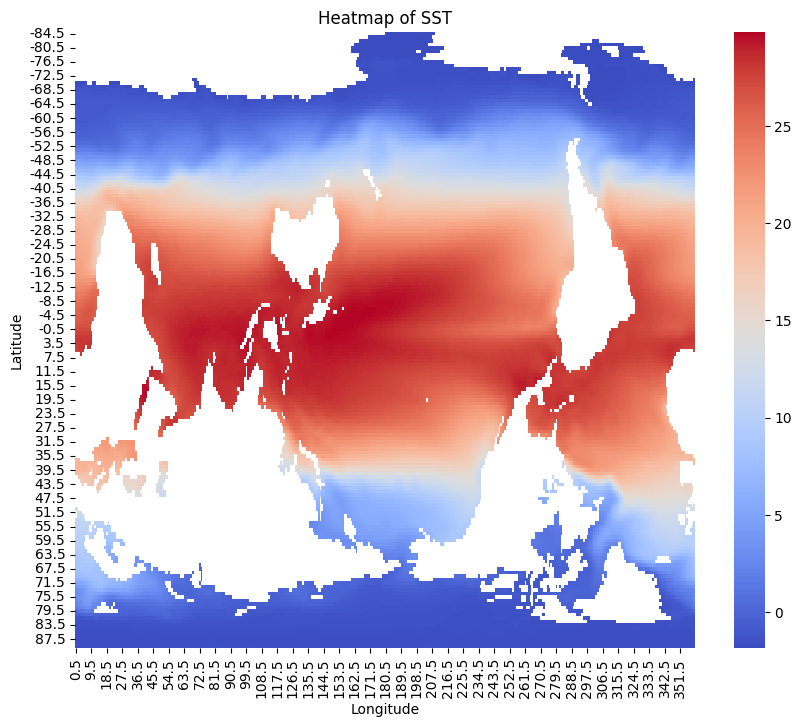

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# تحويل البيانات إلى مصفوفة حرارية
pivot_df = df.pivot_table(values='sst', index='lat', columns='lon')

# رسم حراري
plt.figure(figsize=(10,8))
sns.heatmap(pivot_df, cmap='coolwarm', annot=False)
plt.title('Heatmap of SST')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

من الواضح انخفاض درجة الحرارة في القطب الشمالي والجنوبي واما منطقه المنتصف من الواضح ارتفاع درجة الحرارة فيها 

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


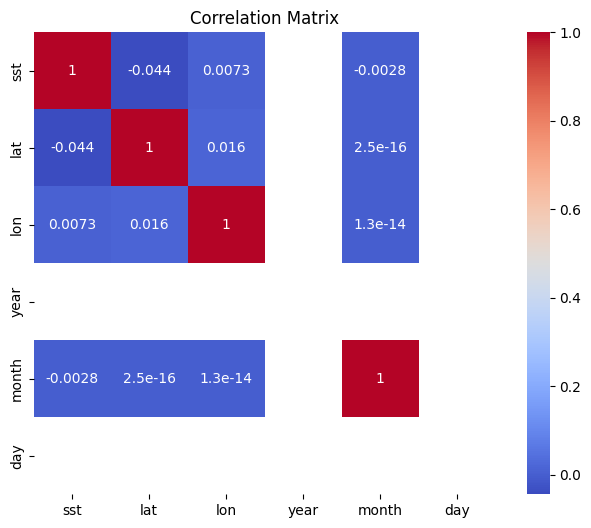

In [23]:
#تبين ارتباط الميزات 
#من الصورة تبين ان الارتباط صعيف ببن الميزات ربما لان الداتا عبارة عن time series 
# حساب مصفوفة الارتباط
corr_matrix = df[['sst', 'lat', 'lon', 'year', 'month', 'day']].corr()

# رسم مصفوفة الارتباط
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# استخدام تقنيات تقليل الالعاظ في هذة البيانات غير مفيد لان البيانات عبارة عن time series 
# وايضا لانها تحتوي علي عدد قليل من الميزات 